In [222]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam 

from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [223]:
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)
df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir", "conditions"]]

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,conditions
0,29.3,24.5,26.9,32.3,24.5,28.7,22.6,77.4,8.8,4.5,"Rain, Partially cloudy"
1,31.0,24.7,27.6,35.4,24.7,29.2,21.9,72.1,16.7,69.1,"Rain, Partially cloudy"
2,31.9,22.8,27.1,34.2,22.8,28.0,19.7,65.0,17.1,66.2,Partially cloudy
3,31.2,21.6,26.8,34.4,21.6,27.9,20.3,68.7,11.1,44.0,"Rain, Partially cloudy"
4,30.9,23.3,27.1,33.0,23.3,28.2,21.1,71.0,17.2,77.8,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...
1303,30.8,25.7,27.8,38.8,25.7,32.4,25.4,86.5,16.7,233.0,"Rain, Overcast"
1304,29.9,24.2,26.9,37.3,24.2,29.6,24.9,89.5,14.6,228.3,"Rain, Overcast"
1305,29.4,21.9,25.7,36.3,21.9,26.9,25.0,94.9,11.2,265.7,"Rain, Overcast"
1306,28.0,24.9,26.6,34.5,24.9,29.0,25.1,92.0,19.3,254.2,"Rain, Overcast"


In [224]:
X = df[["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed", "winddir"]]
y = df["conditions"]
le = LabelEncoder()
y = y.to_numpy()
y = le.fit_transform(y)
df["conditions"] = y
y = df["conditions"]

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=0)

In [225]:
X_train

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir
460,35.0,23.4,28.8,38.5,23.4,31.4,22.0,68.1,12.4,97.3
297,31.6,25.9,27.7,39.0,25.9,30.8,24.8,84.8,10.0,253.2
338,29.0,25.2,27.2,33.6,25.2,29.4,23.5,80.4,8.8,39.2
318,32.7,25.0,28.7,39.1,25.0,32.8,24.4,78.3,12.6,88.2
700,31.1,26.9,28.6,39.1,28.3,32.8,23.7,75.5,10.7,77.4
...,...,...,...,...,...,...,...,...,...,...
551,38.4,24.4,28.1,47.3,24.4,31.7,24.7,82.7,13.4,208.7
348,31.9,23.8,28.2,37.4,23.8,31.1,23.2,75.0,8.6,94.3
36,30.0,24.3,26.7,33.3,24.3,28.0,21.6,74.1,17.9,100.4
401,30.4,24.3,27.3,32.7,24.3,28.4,21.0,69.2,14.6,67.0


In [226]:
y_train

460    3
297    3
338    3
318    3
700    1
      ..
551    3
348    1
36     3
401    1
411    3
Name: conditions, Length: 836, dtype: int32

Epoch 1/100


27/27 - 1s - loss: 6.2313 - accuracy: 0.2775 - val_loss: 2.6196 - val_accuracy: 0.3286 - 856ms/epoch - 32ms/step
Epoch 2/100
27/27 - 0s - loss: 1.0475 - accuracy: 0.3254 - val_loss: 1.5320 - val_accuracy: 0.3238 - 112ms/epoch - 4ms/step
Epoch 3/100
27/27 - 0s - loss: 0.8827 - accuracy: 0.3313 - val_loss: 1.4001 - val_accuracy: 0.3286 - 93ms/epoch - 3ms/step
Epoch 4/100
27/27 - 0s - loss: 0.9472 - accuracy: 0.3289 - val_loss: 1.0089 - val_accuracy: 0.3286 - 92ms/epoch - 3ms/step
Epoch 5/100
27/27 - 0s - loss: 0.8628 - accuracy: 0.3313 - val_loss: 0.8388 - val_accuracy: 0.3286 - 92ms/epoch - 3ms/step
Epoch 6/100
27/27 - 0s - loss: 0.8676 - accuracy: 0.3313 - val_loss: 0.9541 - val_accuracy: 0.3286 - 89ms/epoch - 3ms/step
Epoch 7/100
27/27 - 0s - loss: 0.8168 - accuracy: 0.3313 - val_loss: 1.0420 - val_accuracy: 0.3286 - 94ms/epoch - 3ms/step
Epoch 8/100
27/27 - 0s - loss: 0.8361 - accuracy: 0.3313 - val_loss: 1.2953 - val_accuracy: 0.3286 - 93ms/epoch - 3ms/step
Epoch 9/100
27/27 - 0s - 

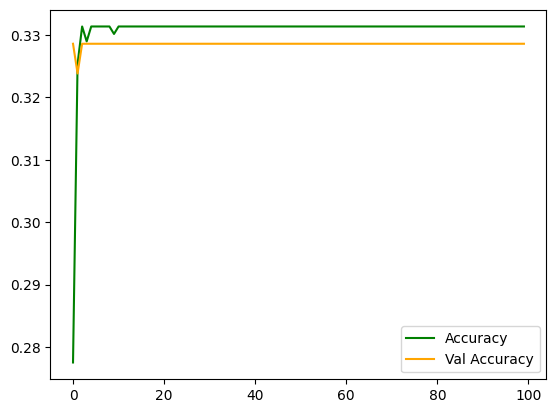

In [227]:
model = Sequential([
    layers.InputLayer(10, 1),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    metrics=["accuracy"])

history = model.fit(
    X_train,
    y_train, 
    validation_data = (X_valid, y_valid),
    epochs = 100,
    verbose = 2
)

plt.plot(history.history["accuracy"], label="Accuracy", color="green")
plt.plot(history.history["val_accuracy"], label="Val Accuracy", color="orange")
plt.legend()
plt.show()